In [1]:
!pip install Keras-Applications
!pip install tensorflow

  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.0.0
    Uninstalling cachetools-5.0.0:
      Successfully uninstalled cachetools-5.0.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.23.0
    Uninstalling google-auth-2.23.0:
      Successfully uninstalled google-auth-2.23.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'g:\\anaconda3\\envs\\machinelearning\\scripts\\tensorboard.exe'
Consider using the `--user` option or check the permissions.



In [12]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install tqdm
!pip install opencv-python


  ERROR: Command errored out with exit status 1:
   command: 'G:\Anaconda3\envs\machinelearning\python.exe' 'G:\Anaconda3\envs\machinelearning\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\rafid\AppData\Local\Temp\tmp89frz5wh'
       cwd: C:\Users\rafid\AppData\Local\Temp\pip-install-it49ttby\opencv-python_8fa40d5fc8204091ac33bd589de65d71
  Complete output (57 lines):
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Visual Studio 15 2017 x64 v141' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  Not searching for unused variables given on the command line.
  CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
    Compatibility with CMake < 3.5 will be removed from a future version of
    CMake.
  
    Update the VERSION argument <min> value or use a ...<max> suffix to tell



  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build opencv-python


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sn; sn.set(font_scale = 1.4)

import tensorflow as tf                
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

import os
import cv2

In [ ]:
import sys
import tensorflow as tf
from tensorflow.python.platform import build_info
import numpy as np


print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)
print("CUDA version:", build_info.cuda_version)
print("cuDNN version:", build_info.cudnn_version)


In [21]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("TensorFlow version:", tf.__version__)


Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12303355199167577354
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3132522496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7736813388702628453
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
]
TensorFlow version: 2.1.0


In [27]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

# Set the GPU as the device for operations
with tf.device('/GPU:0'):
    # Your model training or inference code here
    print("TensorFlow is using GPU.")
    



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using GPU.


In [22]:
EPOCHS = 50
BS = 64
DROPOUT_RATE = 0.25
FROZEN_LAYER_NUM = 170

ADAM_LEARNING_RATE = 0.001
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001

Resize_pixelsize = 197

In [23]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_label = {classes: i for i, classes in enumerate(classes)}

no_of_classes = len(classes)

IMAGE_SIZE = (150, 150)

print("No. of classes: ", no_of_classes)

No. of classes:  6


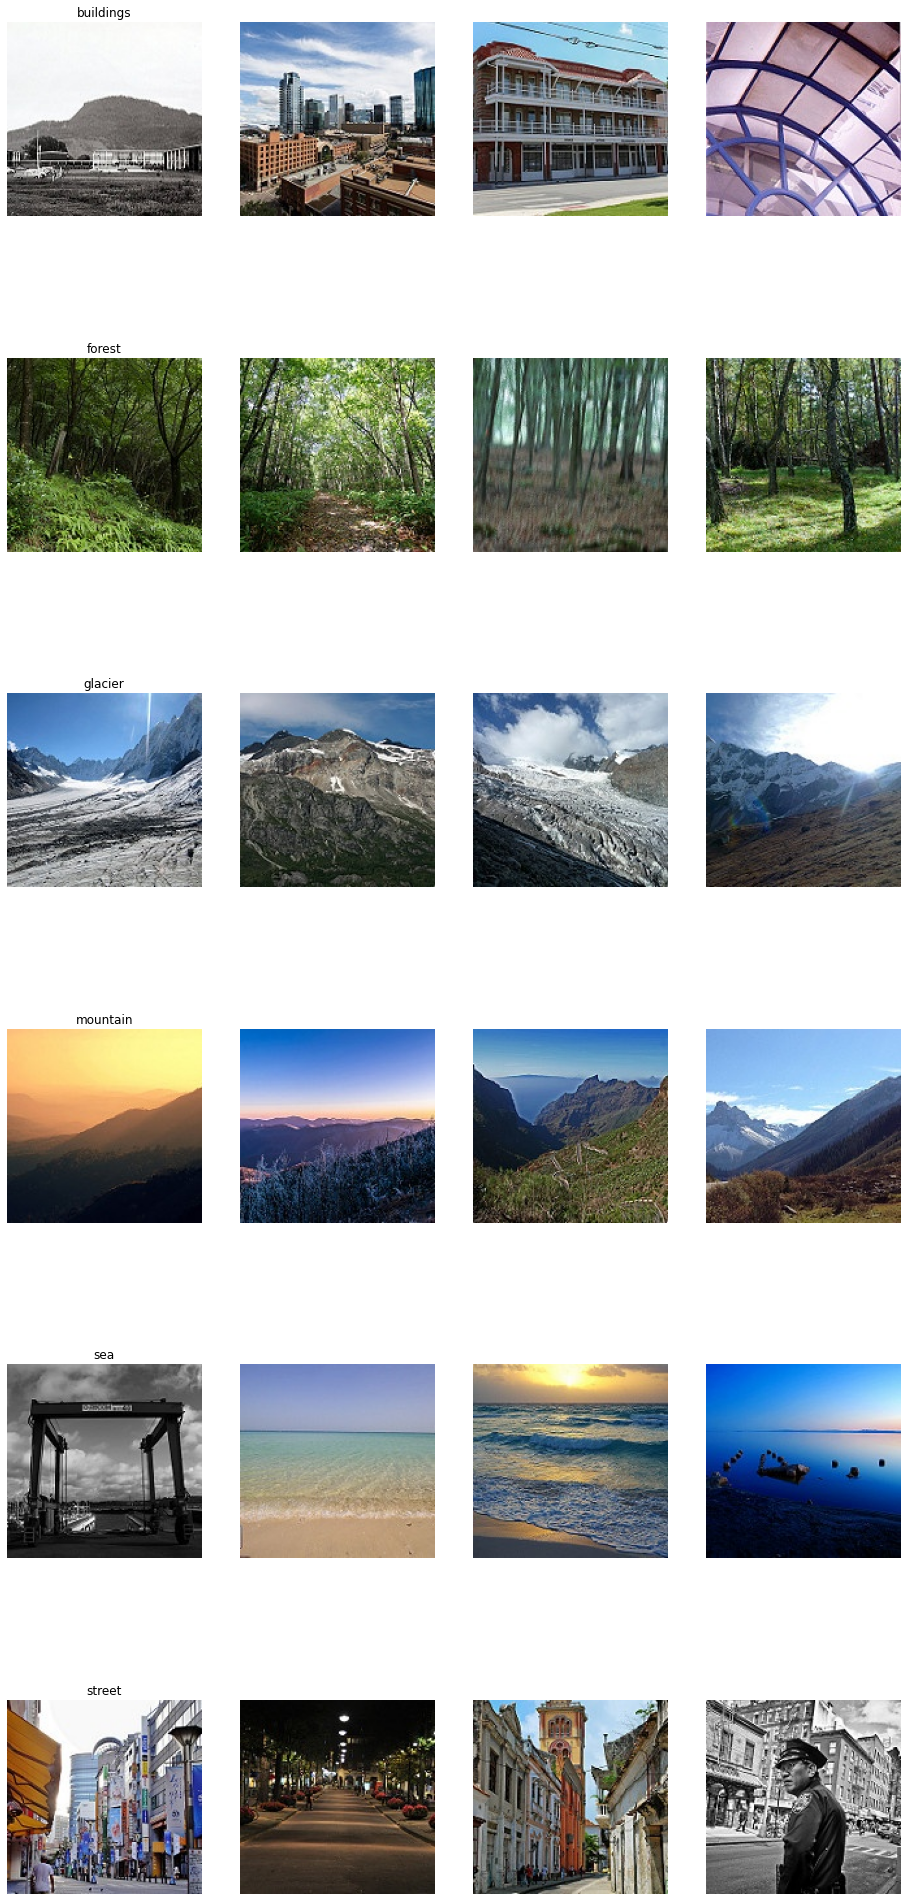

In [24]:
base_dir = r'C:\Users\rafid\OneDrive\Desktop\VSCode\Python\Image Classification\Datasets\Intel Image Classification\seg_train\seg_train'

rows = 6
cols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 6)

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

all_images = []
for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    image_paths = [os.path.join(class_path, fname) for fname in os.listdir(class_path)
                   if fname.lower().endswith(valid_extensions)][pic_index:pic_index + 4]
   
    all_images.extend(image_paths)
                       

for i, img_path in enumerate(all_images):
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

  if i % 4 == 0:
      sp.title.set_text(classes[i // 4])

  
plt.show()

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split = 0.1)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/rafid/OneDrive/Desktop/VSCode/Python/Image Classification/Datasets/Intel Image Classification/seg_train/seg_train/',
    subset = 'training',
    target_size = (150, 150),
    batch_size = BS,
    class_mode = 'sparse',
    seed = 1,
    color_mode = 'rgb',
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/rafid/OneDrive/Desktop/VSCode/Python/Image Classification/Datasets/Intel Image Classification/seg_train/seg_train/',
    subset = 'validation',
    target_size = (150, 150),
    batch_size = BS,
    class_mode = 'sparse',
    seed = 1,
    color_mode = 'rgb',
    shuffle=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/rafid/OneDrive/Desktop/VSCode/Python/Image Classification/Datasets/Intel Image Classification/seg_test/seg_test/',
    target_size = (150, 150),
    batch_size = BS,
    class_mode = 'sparse',
    seed = 1,
    color_mode = 'rgb',
    shuffle = True)

Found 12632 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT_RATE))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT_RATE))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT_RATE))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT_RATE))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT_RATE))

model.add(Dense(6, activation='softmax'))

rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.5, patience=20, min_lr= 0.00001, verbose=1)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0, patience=20, restore_best_weights=True, verbose=2)

callbacks_list = [rlrop, early_stop]

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)       

In [30]:
history = model.fit(
    x = train_generator,
    validation_data = validation_generator,
    shuffle = True,
    epochs = EPOCHS,
    steps_per_epoch = 12632//BS,
    validation_steps =  1402//BS,
    callbacks = callbacks_list,
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 197 steps, validate for 21 steps
Epoch 1/50
197/197 [==============================] - 69s 350ms/step - loss: 1.5474 - accuracy: 0.4175 - val_loss: 3.4967 - val_accuracy: 0.1607
Epoch 2/50
197/197 [==============================] - 66s 336ms/step - loss: 1.0687 - accuracy: 0.5823 - val_loss: 1.7750 - val_accuracy: 0.3743
Epoch 3/50
197/197 [==============================] - 66s 333ms/step - loss: 0.9044 - accuracy: 0.6634 - val_loss: 0.9815 - val_accuracy: 0.6168
Epoch 4/50
197/197 [==============================] - 66s 334ms/step - loss: 0.8015 - accuracy: 0.7185 - val_loss: 0.9130 - val_accuracy: 0.6987
Epoch 5/50
197/197 [==============================] - 66s 335ms/step - loss: 0.7461 - accuracy: 0.7482 - val_loss: 0.9344 - val_accuracy: 0.6949
Epoch 6/50
197/197 [==============================] - 66s 333ms/step - loss: 0.7041 - accuracy: 0.7650 - val_loss: 0.8797 - val_accuracy: 0.6815
Epoch 7/50
197/197 [==============================] - 67s 338ms/step - loss: 0.6628 - a

In [36]:
Test_results = model.evaluate_generator(test_generator, steps=len(test_generator)//BS)
print('Test Loss, Test Accuracy: ', accuracy)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Test Loss, Test Accuracy:  [0.8842353827141701, 0.78]


In [32]:
Validation_results = model.evaluate_generator(validation_generator, steps=len(validation_generator)//BS)
print('Validation Loss, Validation Accuracy: ', Validation_results)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Validation Loss, Validation Accuracy:  [0.7735987766222521, 0.79885876]


In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


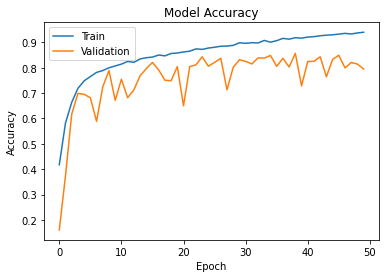

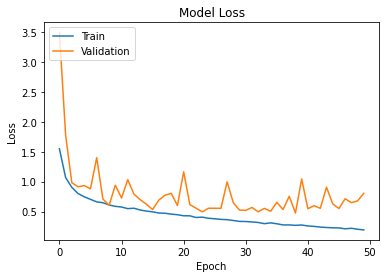

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
epoch_str = '-EPOCHS_' + str(EPOCHS)
test_acc = 'test_acc_%.3f' % Test_results[1]
model.save('/Users/rafid/OneDrive/Desktop/VSCode/Python/Image Classification/Saved Models' + 'Keras-CNN' + epoch_str + test_acc + '.h5')